In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import os
from pathlib import Path
BASE_DIR = Path('.').resolve().parent.parent.parent
os.chdir(BASE_DIR)
from phm08ds.models import experiment

## Load Dataset

In [2]:
folderpath = '../../../data/interim/'
data_op_1 = pd.read_csv(folderpath + 'data_op_01.csv')
data_op_1.head()

unit  time_step  operational_setting_1  operational_setting_2  \
0      1          1                10.0047                 0.2501   
14     1         15                 9.9988                 0.2500   
15     1         16                 9.9987                 0.2500   
17     1         18                10.0066                 0.2507   
35     1         36                10.0024                 0.2504   

    operational_setting_3  Sensor_0  Sensor_1  Sensor_2  Sensor_3  Sensor_4  \
0                    20.0    489.05    604.13   1499.45   1309.95     10.52   
14                   20.0    489.05    604.63   1497.87   1302.51     10.52   
15                   20.0    489.05    604.61   1500.47   1311.39     10.52   
17                   20.0    489.05    604.23   1502.57   1304.56     10.52   
35                   20.0    489.05    604.43   1499.85   1306.89     10.52   

            ...            Sensor_13  Sensor_14  Sensor_15  Sensor_16  \
0           ...              8120.83     8.6216       0.03        368   
14          ...              8124.37     8.6496       0.03        369   
15          ...              8127.07     8.6609       0.03        369   
17          ...              8119.39     8.6646       0.03        367   
35          ...              8121.73     8.6260       0.03        369   

    Sensor_17  Sensor_18  Sensor_19  Sensor_20  Health_state  \
0        2319      100.0      28.58    17.1735             1   
14       2319      100.0      28.84    17.0805             1   
15       2319      100.0      28.71    17.1759             1   
17       2319      100.0      28.60    17.1096             1   
35       2319      100.0      28.52    17.1036             2   

    Operational_condition  
0                       1  
14                      1  
15                      1  
17                      1  
35                      1  

[5 rows x 28 columns]

## Data preprocessing

### Get rid of informations there are not sensor readings

Wang (2008) reports Sensor 15 has importat information. However, there are no relevant informations of this sensor. The data seems to be corrupted like this:

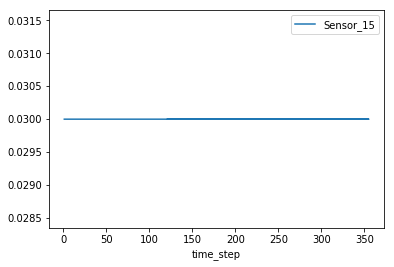

In [3]:
data_op_1.plot(x='time_step', y='Sensor_15')

Let's remove it from our database creating an object transformer.

In [4]:
from phm08ds.features.feature_selection import RemoveSensor

tf_remove_sensor_15 = RemoveSensor(sensors=[15])
data_op_1 = tf_remove_sensor_15.fit_transform(data_op_1)
data_op_1.head()

unit  time_step  operational_setting_1  operational_setting_2  \
0      1          1                10.0047                 0.2501   
14     1         15                 9.9988                 0.2500   
15     1         16                 9.9987                 0.2500   
17     1         18                10.0066                 0.2507   
35     1         36                10.0024                 0.2504   

    operational_setting_3  Sensor_0  Sensor_1  Sensor_2  Sensor_3  Sensor_4  \
0                    20.0    489.05    604.13   1499.45   1309.95     10.52   
14                   20.0    489.05    604.63   1497.87   1302.51     10.52   
15                   20.0    489.05    604.61   1500.47   1311.39     10.52   
17                   20.0    489.05    604.23   1502.57   1304.56     10.52   
35                   20.0    489.05    604.43   1499.85   1306.89     10.52   

            ...            Sensor_12  Sensor_13  Sensor_14  Sensor_16  \
0           ...              2388.13    8120.83     8.6216        368   
14          ...              2388.12    8124.37     8.6496        369   
15          ...              2388.08    8127.07     8.6609        369   
17          ...              2388.06    8119.39     8.6646        367   
35          ...              2388.11    8121.73     8.6260        369   

    Sensor_17  Sensor_18  Sensor_19  Sensor_20  Health_state  \
0        2319      100.0      28.58    17.1735             1   
14       2319      100.0      28.84    17.0805             1   
15       2319      100.0      28.71    17.1759             1   
17       2319      100.0      28.60    17.1096             1   
35       2319      100.0      28.52    17.1036             2   

    Operational_condition  
0                       1  
14                      1  
15                      1  
17                      1  
35                      1  

[5 rows x 27 columns]

Before feeding to the classifier, let's remove unwanted information, such as unit, time_step and operational settings.

In [5]:
from phm08ds.features.feature_selection import RemoveInfo

tf_remove_info = RemoveInfo()

data_with_features = tf_remove_info.fit_transform(data_op_1)
data_with_features.head()

Sensor_0  Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  \
0     489.05    604.13   1499.45   1309.95     10.52     15.49    394.88   
14    489.05    604.63   1497.87   1302.51     10.52     15.50    394.93   
15    489.05    604.61   1500.47   1311.39     10.52     15.49    394.44   
17    489.05    604.23   1502.57   1304.56     10.52     15.49    394.31   
35    489.05    604.43   1499.85   1306.89     10.52     15.49    394.36   

    Sensor_7  Sensor_8  Sensor_9      ...       Sensor_11  Sensor_12  \
0    2318.87   8770.20      1.26      ...          372.15    2388.13   
14   2318.90   8771.08      1.26      ...          371.84    2388.12   
15   2318.87   8775.86      1.26      ...          372.19    2388.08   
17   2318.93   8778.55      1.26      ...          372.03    2388.06   
35   2318.94   8771.15      1.26      ...          371.77    2388.11   

    Sensor_13  Sensor_14  Sensor_16  Sensor_17  Sensor_18  Sensor_19  \
0     8120.83     8.6216        368       2319      100.0      28.58   
14    8124.37     8.6496        369       2319      100.0      28.84   
15    8127.07     8.6609        369       2319      100.0      28.71   
17    8119.39     8.6646        367       2319      100.0      28.60   
35    8121.73     8.6260        369       2319      100.0      28.52   

    Sensor_20  Health_state  
0     17.1735             1  
14    17.0805             1  
15    17.1759             1  
17    17.1096             1  
35    17.1036             2  

[5 rows x 21 columns]

We need to normalize our data. Let's use Z-score standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler

tf_std_scaller = StandardScaler()
data_with_features_std = tf_std_scaller.fit_transform(data_with_features.drop(labels='Health_state', axis=1))
data_with_features_std

In [7]:
labels_op_1 = np.array(data_with_features['Health_state'])
labels_op_1

array([1, 1, 1, ..., 4, 4, 4])

# Classification steps

## Load Experiment model

In [8]:
from phm08ds.models import experiment

## Define classifiers and its specifications

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
knn_clf = KNeighborsClassifier()
random_forest_clf = RandomForestClassifier()
naive_bayes_clf = GaussianNB()
gaussian_linear_clf = LinearDiscriminantAnalysis()
gaussian_quadratic_clf = QuadraticDiscriminantAnalysis()
perceptron_clf = Perceptron()
sgd_clf = SGDClassifier()

In [17]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
random_forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
perceptron_clf

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [22]:
sgd_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

## Put all clf in a dictionary:

In [11]:
classifiers = {'KNN': knn_clf, 'RF': random_forest_clf, 'Naive_bayes': naive_bayes_clf,
               'Gaussian_linear': gaussian_linear_clf, 'Gaussian_quadratic': gaussian_quadratic_clf,
               'Perceptron': perceptron_clf, 'SGDClassifier': sgd_clf}

## Train Classifiers and test them

Stratified cross-validation for model selection are going to be used.

In [12]:
kfolds = 10
clf_outputs = experiment.run_classifiers(data_with_features_std, labels_op_1, classifiers, kfolds)

/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/home/navar/anaconda3/envs/phm08ds/lib/py

## Performance assessment

Saving variables in a dictionary:

In [13]:
results = {}
results['train'] = experiment.results_clf(4, clf_outputs['train']['true'], clf_outputs['train']['pred'])
results['test'] = experiment.results_clf(4, clf_outputs['test']['true'], clf_outputs['test']['pred'])

/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/phm08ds/models/experiment.py:149: RuntimeWarning: invalid value encountered in double_scalars
  metrics_class[i,2] = TP / (TP + FP)


## Savel results, models and pipeline to a .pkl file 

In [14]:
from sklearn.pipeline import Pipeline

data_preprocessing = Pipeline([('remove_sensor_15', tf_remove_sensor_15),
                               ('remove_info', tf_remove_info),
                               ('std_scaler', tf_std_scaller)
                              ])

In [15]:
experiment.save_models(classifiers)
experiment.save_pipeline(data_preprocessing)

## Save results to CSVs and figures

In [16]:
experiment.export_results(results['test'], 'test')
experiment.export_results(results['train'], 'train')

/mnt/Work/Mestrado/Mestrado/MP-Safety_ITA/Analyses_and_Experiments/PHM08_data_science/notebooks/E01_PHM08-train_CLF/model_selection-OP_01-navarmn
KNN
RF
Naive_bayes
Gaussian_linear
Gaussian_quadratic
Perceptron
SGDClassifier
/mnt/Work/Mestrado/Mestrado/MP-Safety_ITA/Analyses_and_Experiments/PHM08_data_science/notebooks/E01_PHM08-train_CLF/model_selection-OP_01-navarmn
KNN
RF
Naive_bayes
Gaussian_linear
Gaussian_quadratic
Perceptron
SGDClassifier
